In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

C:\Users\BUNNY\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train)

11490434/11490434 [==============================] - 2s 0us/step


60000

In [3]:
len(X_test)

10000

In [4]:
X_train[0].shape

(28, 28)

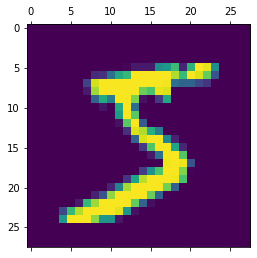

In [5]:
plt.matshow(X_train[0])

In [6]:
X_train = X_train / 255
X_test = X_test / 255  #normalized (0 to 1)

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [9]:
X_train_flattened.shape

(60000, 784)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4719 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9257


In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2680 - accuracy: 0.9239


[0.2679959833621979, 0.9239000082015991]

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.0486815e-02, 3.5361737e-07, 4.8415173e-02, 9.6166342e-01,
       2.1729553e-03, 1.3153206e-01, 1.7191305e-06, 9.9981755e-01,
       7.6753713e-02, 6.2443501e-01], dtype=float32)

In [13]:
np.argmax(y_predicted[0])

7

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [15]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,   11,  902,   23,   12,    6,   12,   12,   44,    3],
       [   3,    0,   13,  927,    0,   23,    2,   12,   23,    7],
       [   1,    1,    2,    2,  922,    0,   11,    4,    9,   30],
       [   8,    3,    3,   37,   13,  773,   13,    7,   30,    5],
       [  11,    3,    6,    1,    7,   15,  910,    2,    3,    0],
       [   1,    5,   20,    7,    8,    0,    0,  958,    3,   26],
       [   6,    8,    5,   24,    9,   28,    8,   14,  866,    6],
       [  10,    7,    1,   10,   30,    7,    0,   30,    7,  907]])>

Text(69.0, 0.5, 'Truth')

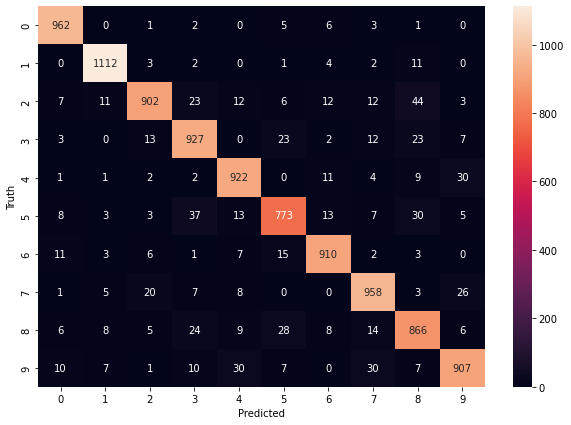

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')